In [1]:
import numpy as np
%matplotlib inline

import utils
import plotter
import bao_utils
from colors_labels import *

%load_ext autoreload
%autoreload 2

import matplotlib
from matplotlib import pyplot as plt
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 200
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (4, 2),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'x-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.autolayout': True,
         'text.usetex': True,
         'text.latex.preamble': [r"\usepackage{bm}"]}
pylab.rcParams.update(params)

In [2]:
plot_dir = '../plots/plots_2020-12-23'

In [3]:
cosmo_b17 = bao_utils.get_cosmo('b17')
cosmo_patchy = bao_utils.get_cosmo('patchy')

z = 0.57
alpha_true = bao_utils.compute_alpha(z, cosmo_patchy, cosmo_b17)

0.260448 0.31000013381653335 0.04814257203879415 0.676 0.96 [0.06] 0.8240000000000002 2.0328
0.258909 0.307115 0.048206 0.6777 0.9611 [] 0.8287999999999998 3.046
Truth: r_s: 151.67742739223243 D_A: 1386.2717002193544 Mpc H: 92.96723955259797 km / (Mpc s)
Fiducial: r_s: 151.63251902228856 D_A: 1388.2262641091736 Mpc H: 92.93688137290822 km / (Mpc s)
alpha: 0.9986566144917456


In [4]:
Omega0_m_patchy = cosmo_patchy.Omega0_cdm + cosmo_patchy.Omega0_b
r_s = bao_utils.compute_radius_sound_horizon(Omega0_m_patchy, cosmo_patchy.Omega0_b, cosmo_patchy.h)

In [5]:
# truth same for all number densities, just choose one
cat_tag = '_L750_n1e-4_z057_patchy'
r_true, xi_true = utils.load_true(cat_tag, bias=2.0)
rpeak_guess = 100.0
bw = 4
r_width = 14.0
r_peak_arr, bad_array, fit_array = utils.find_peaks_center([r_true], [xi_true], rpeak_guess, bws=[bw], r_widths=[r_width])
r_points, xi_points, popt = fit_array
r_max_true = r_peak_arr[0][0]

plt.figure()
color = 'purple'
plt.plot(r_true, xi_true, color=color)
plt.plot(r_true, utils.quadratic(r_true, *popt), color='magenta')
plt.scatter(r_points, xi_points, marker='o', s=20, color='grey')
plt.axvline(r_max_true, color=color, label='found peak')
plt.axvline(r_s*cosmo_patchy.h, color='black', ls='--', label='true $r_s$')

plt.legend()
plt.xlim(60, 120)
plt.ylim(-0.002, 0.01)

print("True r_s:", r_s*cosmo_patchy.h)
print("Found peak:", r_max_true)

OSError: ../catalogs/inputs/cat_L750_n1e-4_z057_patchy_Rh_xi.txt not found.

### basis functions

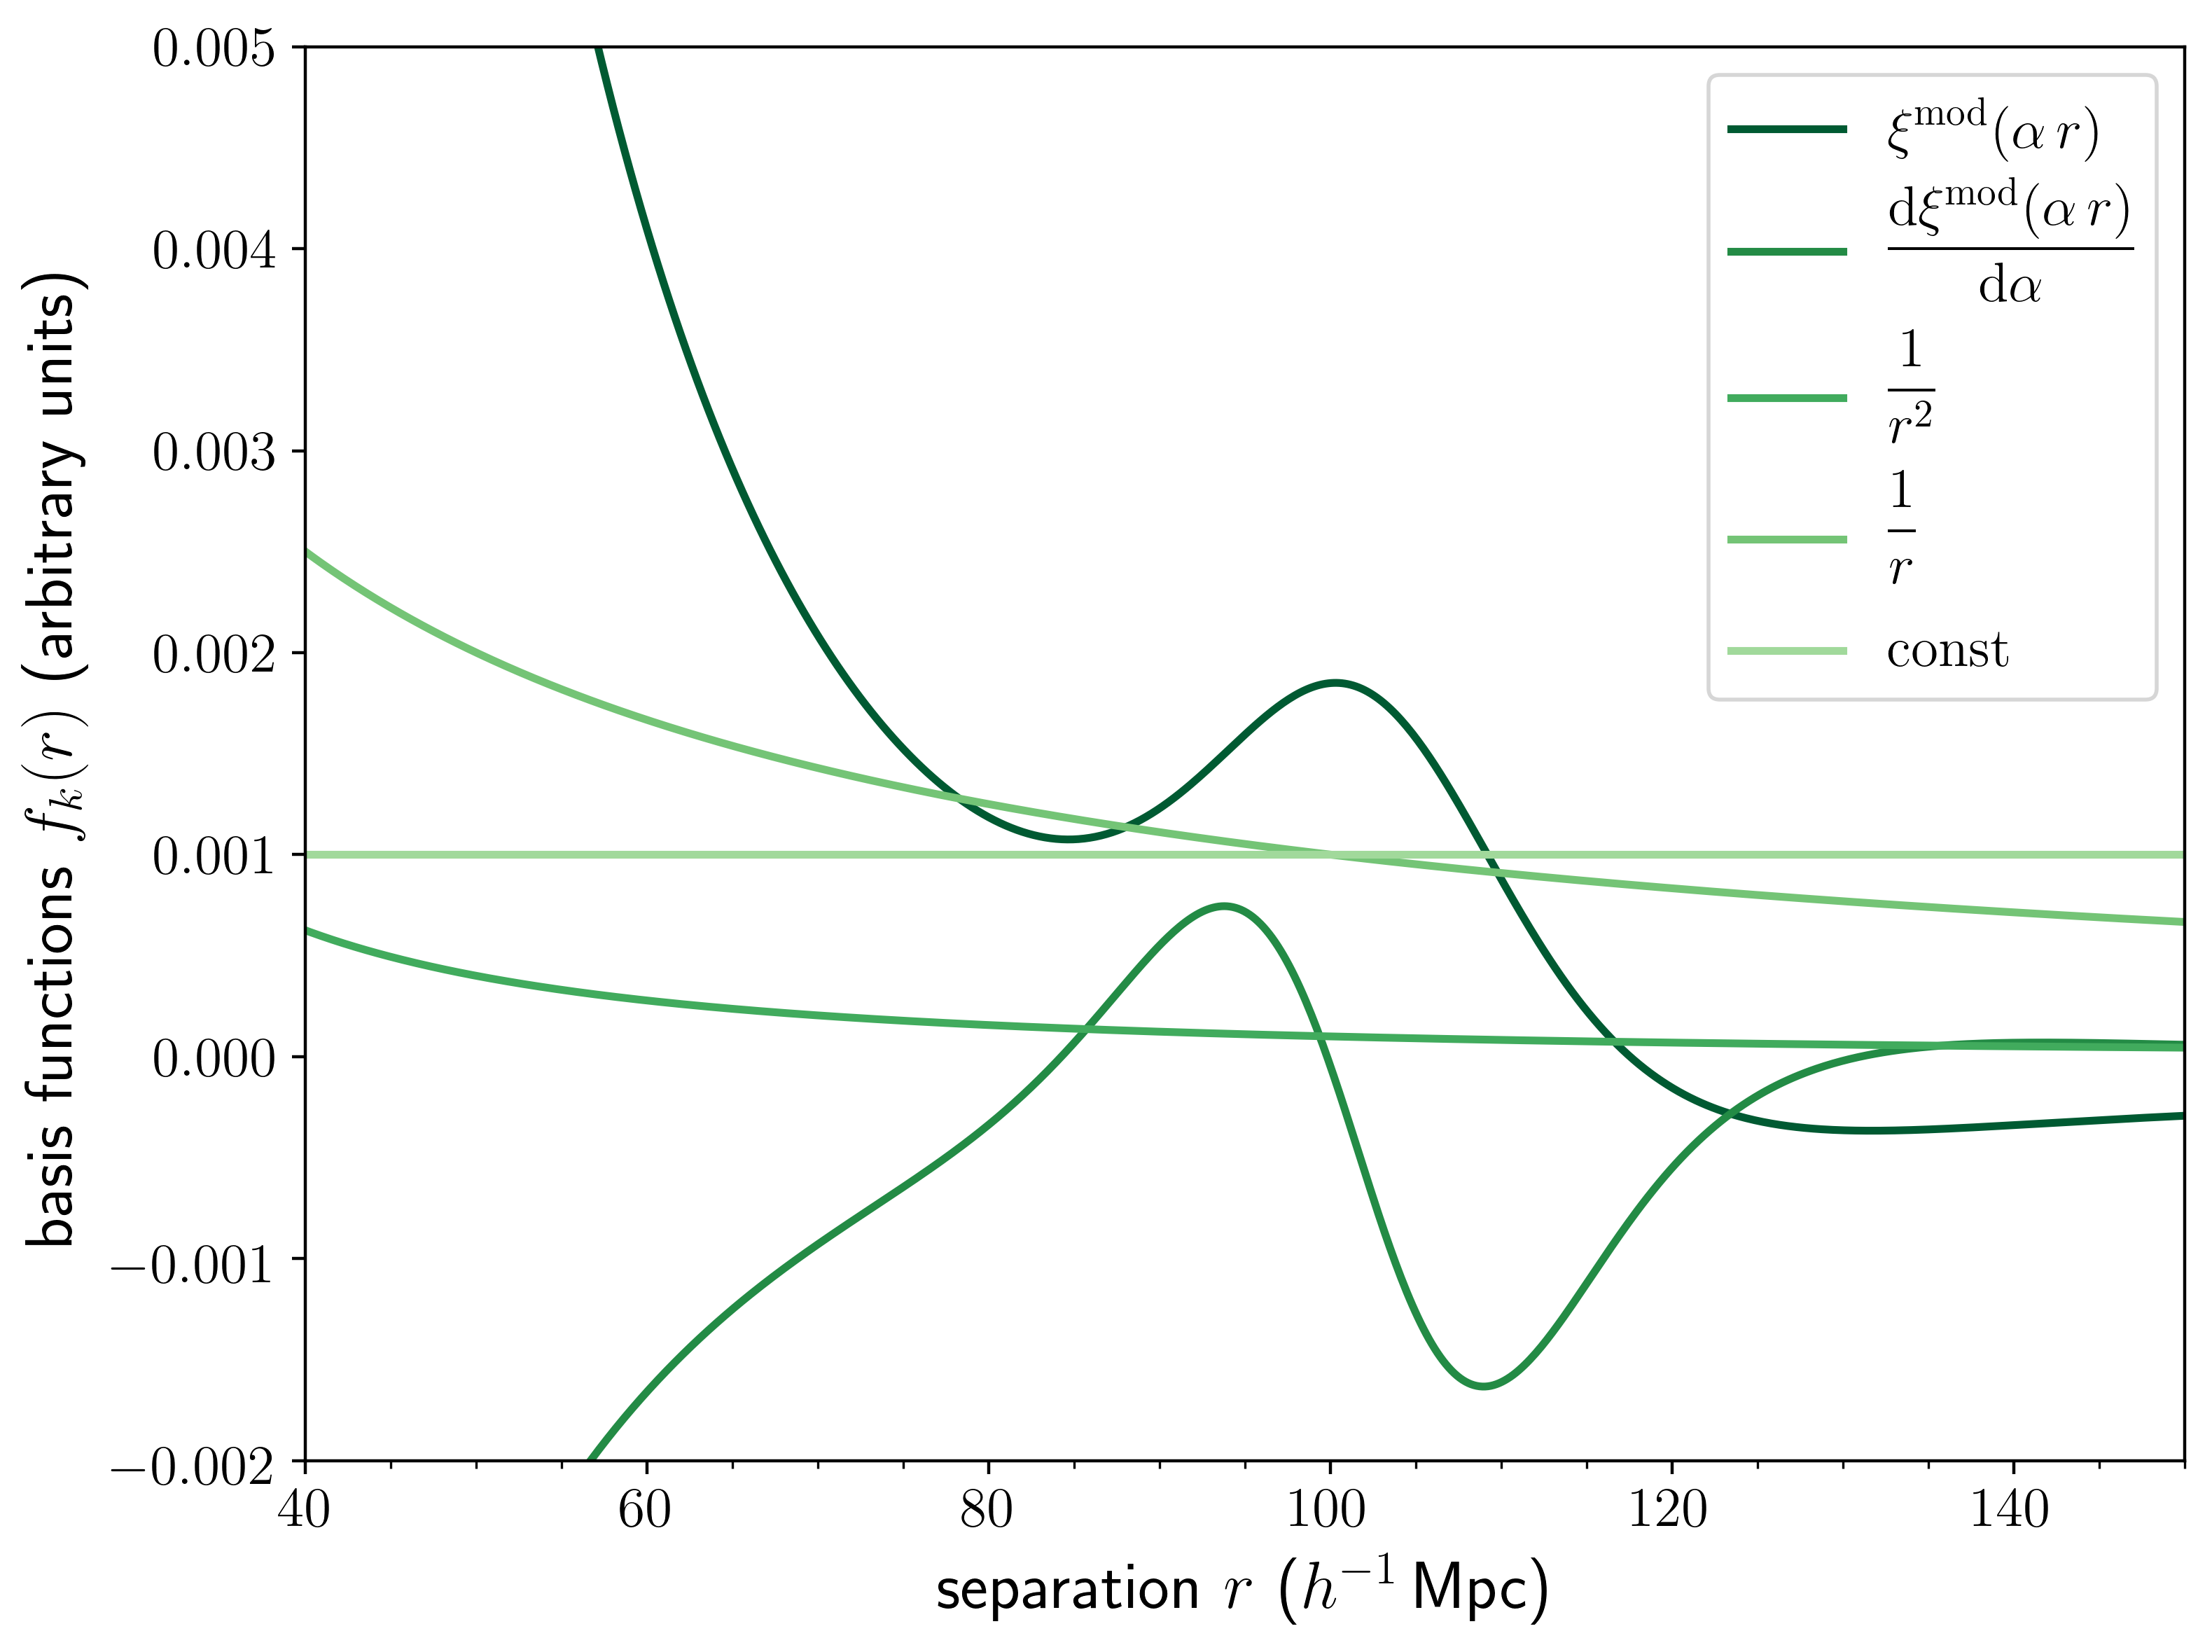

In [15]:
boxsize = 750
cat_tag = f'_L{boxsize}_n2e-4_z057_patchy'
proj = 'baoiter'
cosmo_name = 'b17'
cf_tag = f"_{proj}_cosmo{cosmo_name}_convtest"
redshift = 0.57
bias = 2.0

rmin=36.0
rmax=200.0

projfn_start = f"../tables/bases{cat_tag}{cf_tag}_r{rmin}-{rmax}_z{redshift}_bias{bias}.dat"
rescale_by = np.ones(5)
rescale_by[4] = 0.1
bases = np.loadtxt(projfn_start)
# base_names = [r'$\displaystyle \frac{k_1}{r^2}$', 
#               r'$\displaystyle \frac{k_2}{r}$', 
#               r'$\displaystyle k_3$', 
#               r'$\displaystyle \bm{\xi}^\mathrm{mod}(\alpha_\mathrm{guess} r)$', 
#               r'$\displaystyle k_0 \frac{\mathrm{d} \bm{\xi}^\mathrm{mod}(\alpha_\mathrm{guess} r)}{\mathrm{d} \alpha}$']
base_names = [r'$\displaystyle \frac{1}{r^2}$', 
              r'$\displaystyle \frac{1}{r}$', 
              r'$\displaystyle \mathrm{const}$', 
              r'$\displaystyle \xi^\mathrm{mod}(\alpha \, r)$', 
              r'$\displaystyle \frac{\mathrm{d} \xi^\mathrm{mod}(\alpha \, r)}{\mathrm{d} \alpha}$']


plotter.plot_bases(bases, bao_base_colors, names=base_names, rescale_by=rescale_by)

plt.savefig(f'{plot_dir}/bao_bases.png', bbox='tight')

# tophat  / standard

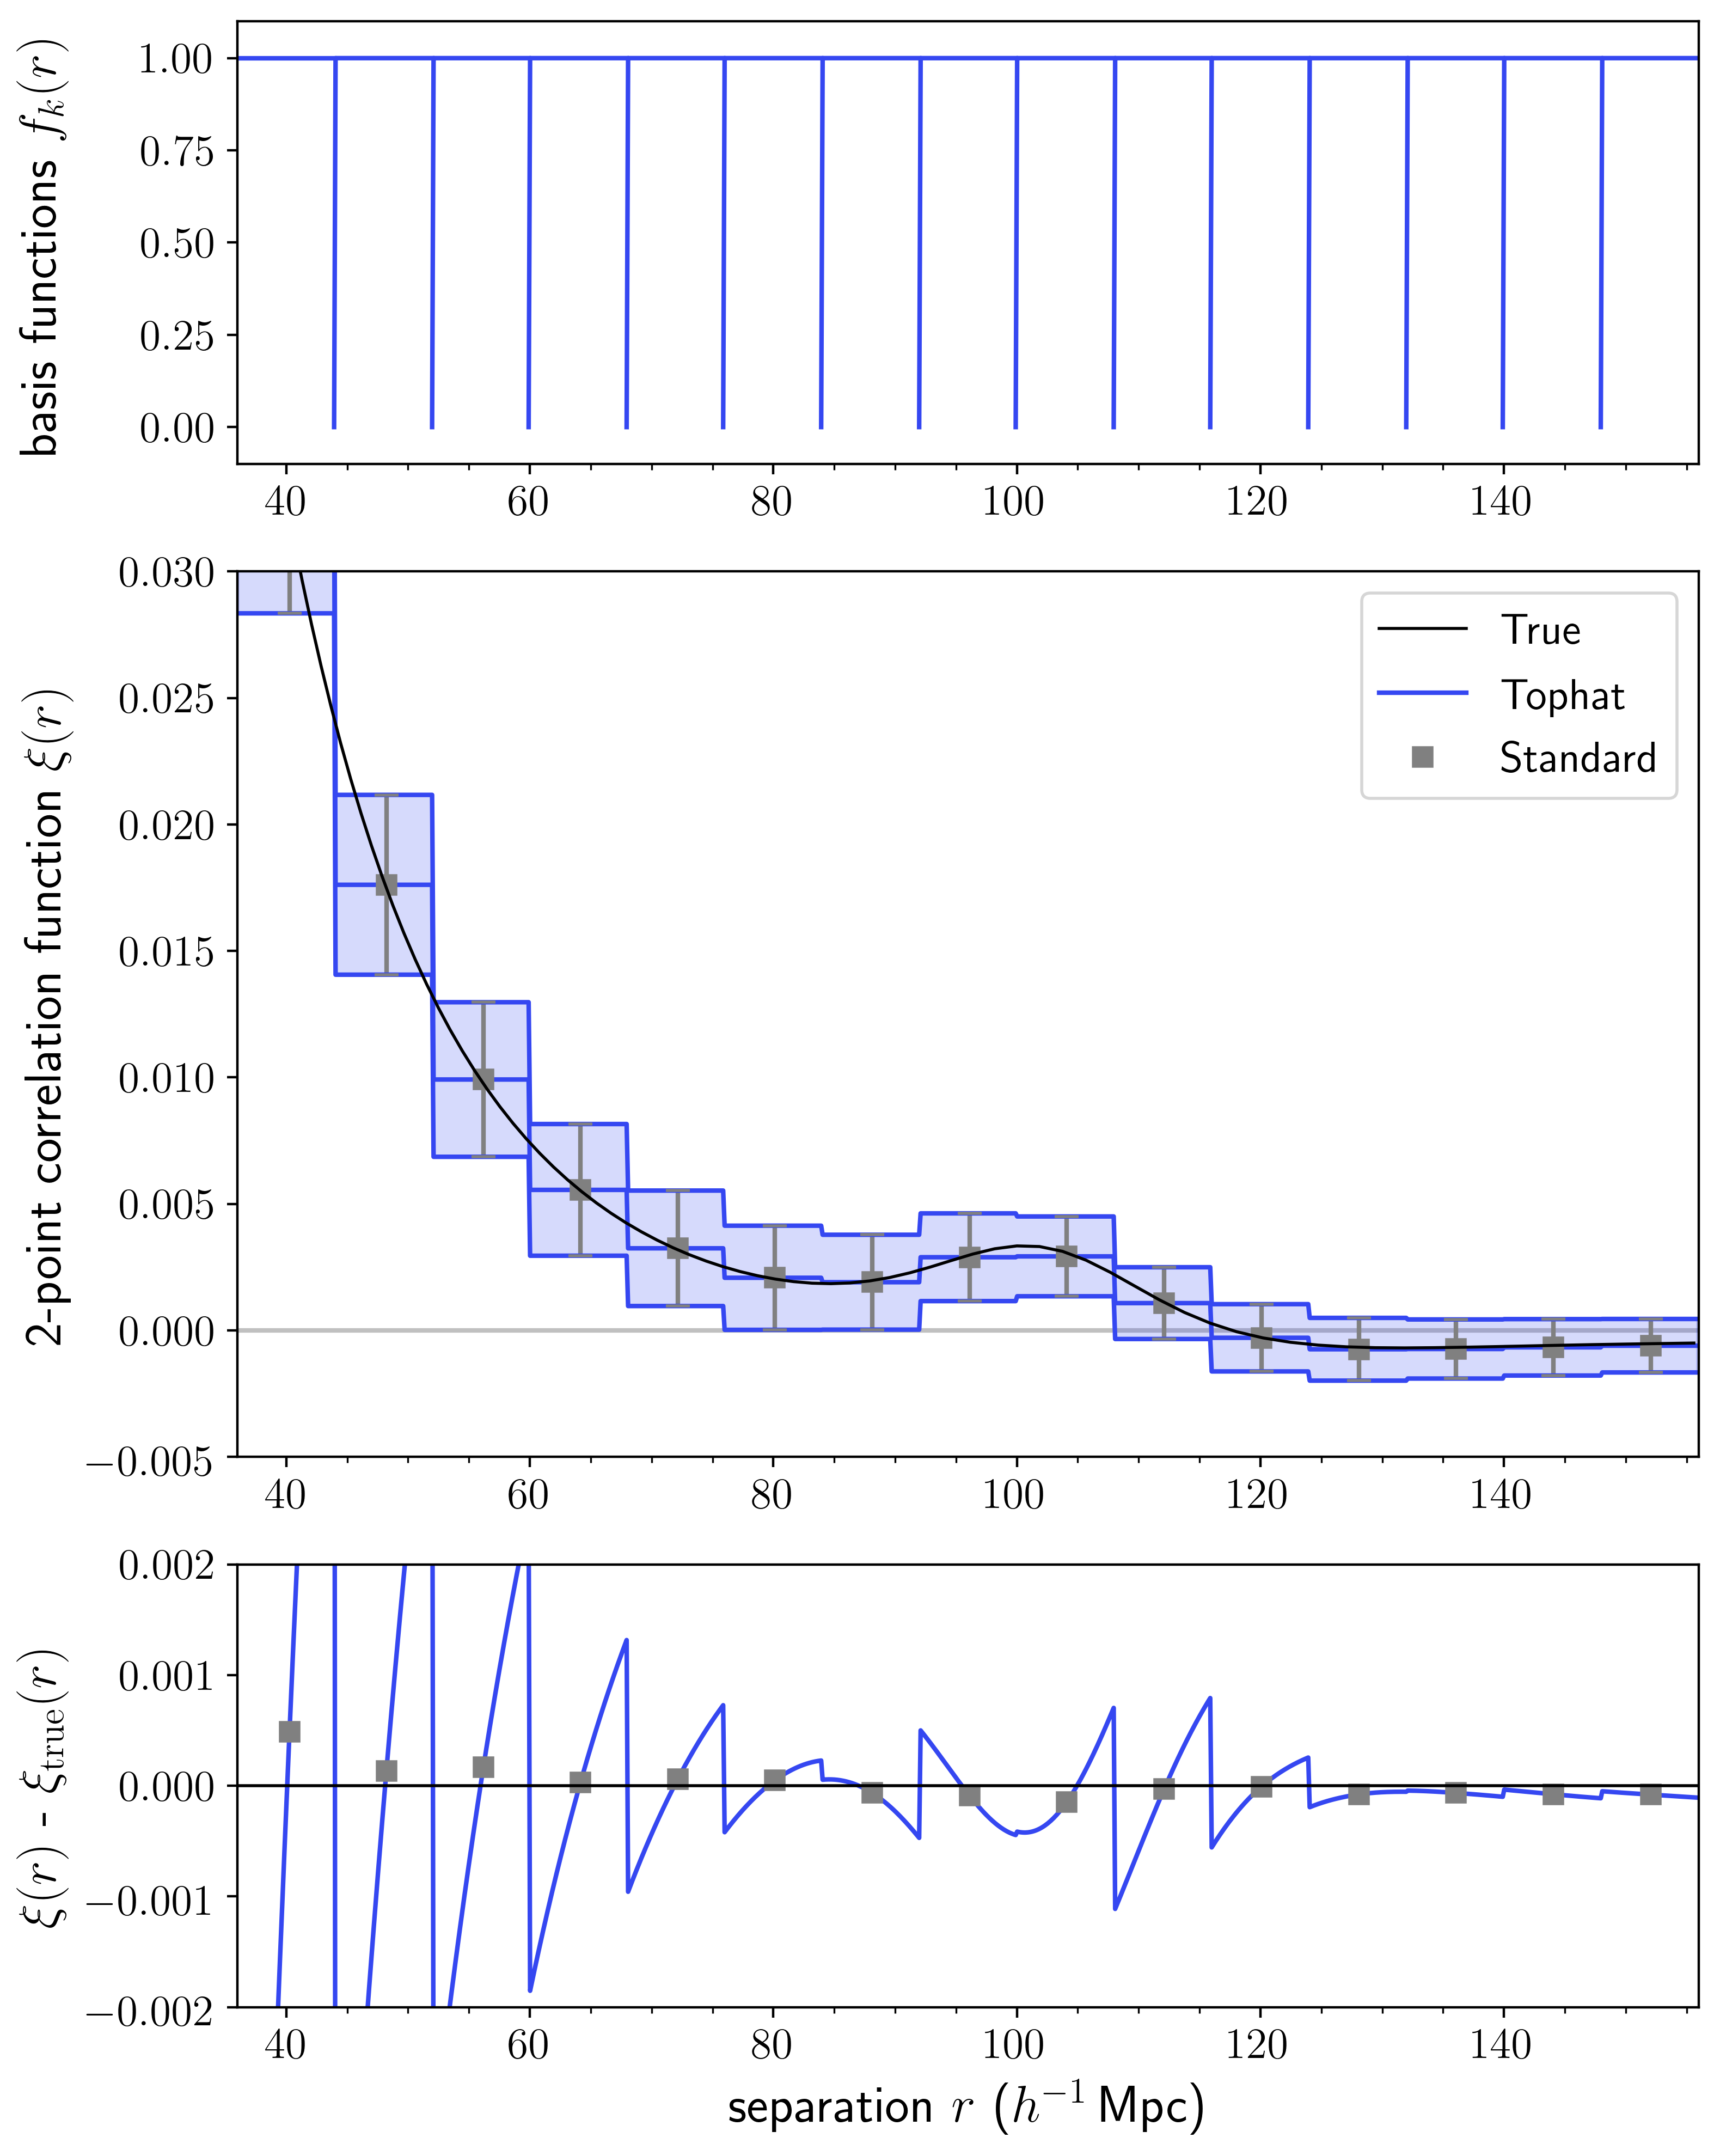

In [31]:
nbar = '1e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_theory_bw8']
colors = [ctopmid, ctheory]
labels = ['Tophat', 'Standard']
lws = [1.5, 0]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws,
                             Nrealizations=1000, show_bases=True, errlim=[-0.002, 0.002], ylim=[-0.005, 0.03],
                             conts=[True,False],
                             peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)

save_fn = f'xicomparison_{nbar}_tophat8_theory8.png'
plt.savefig(f'{plot_dir}/{save_fn}')

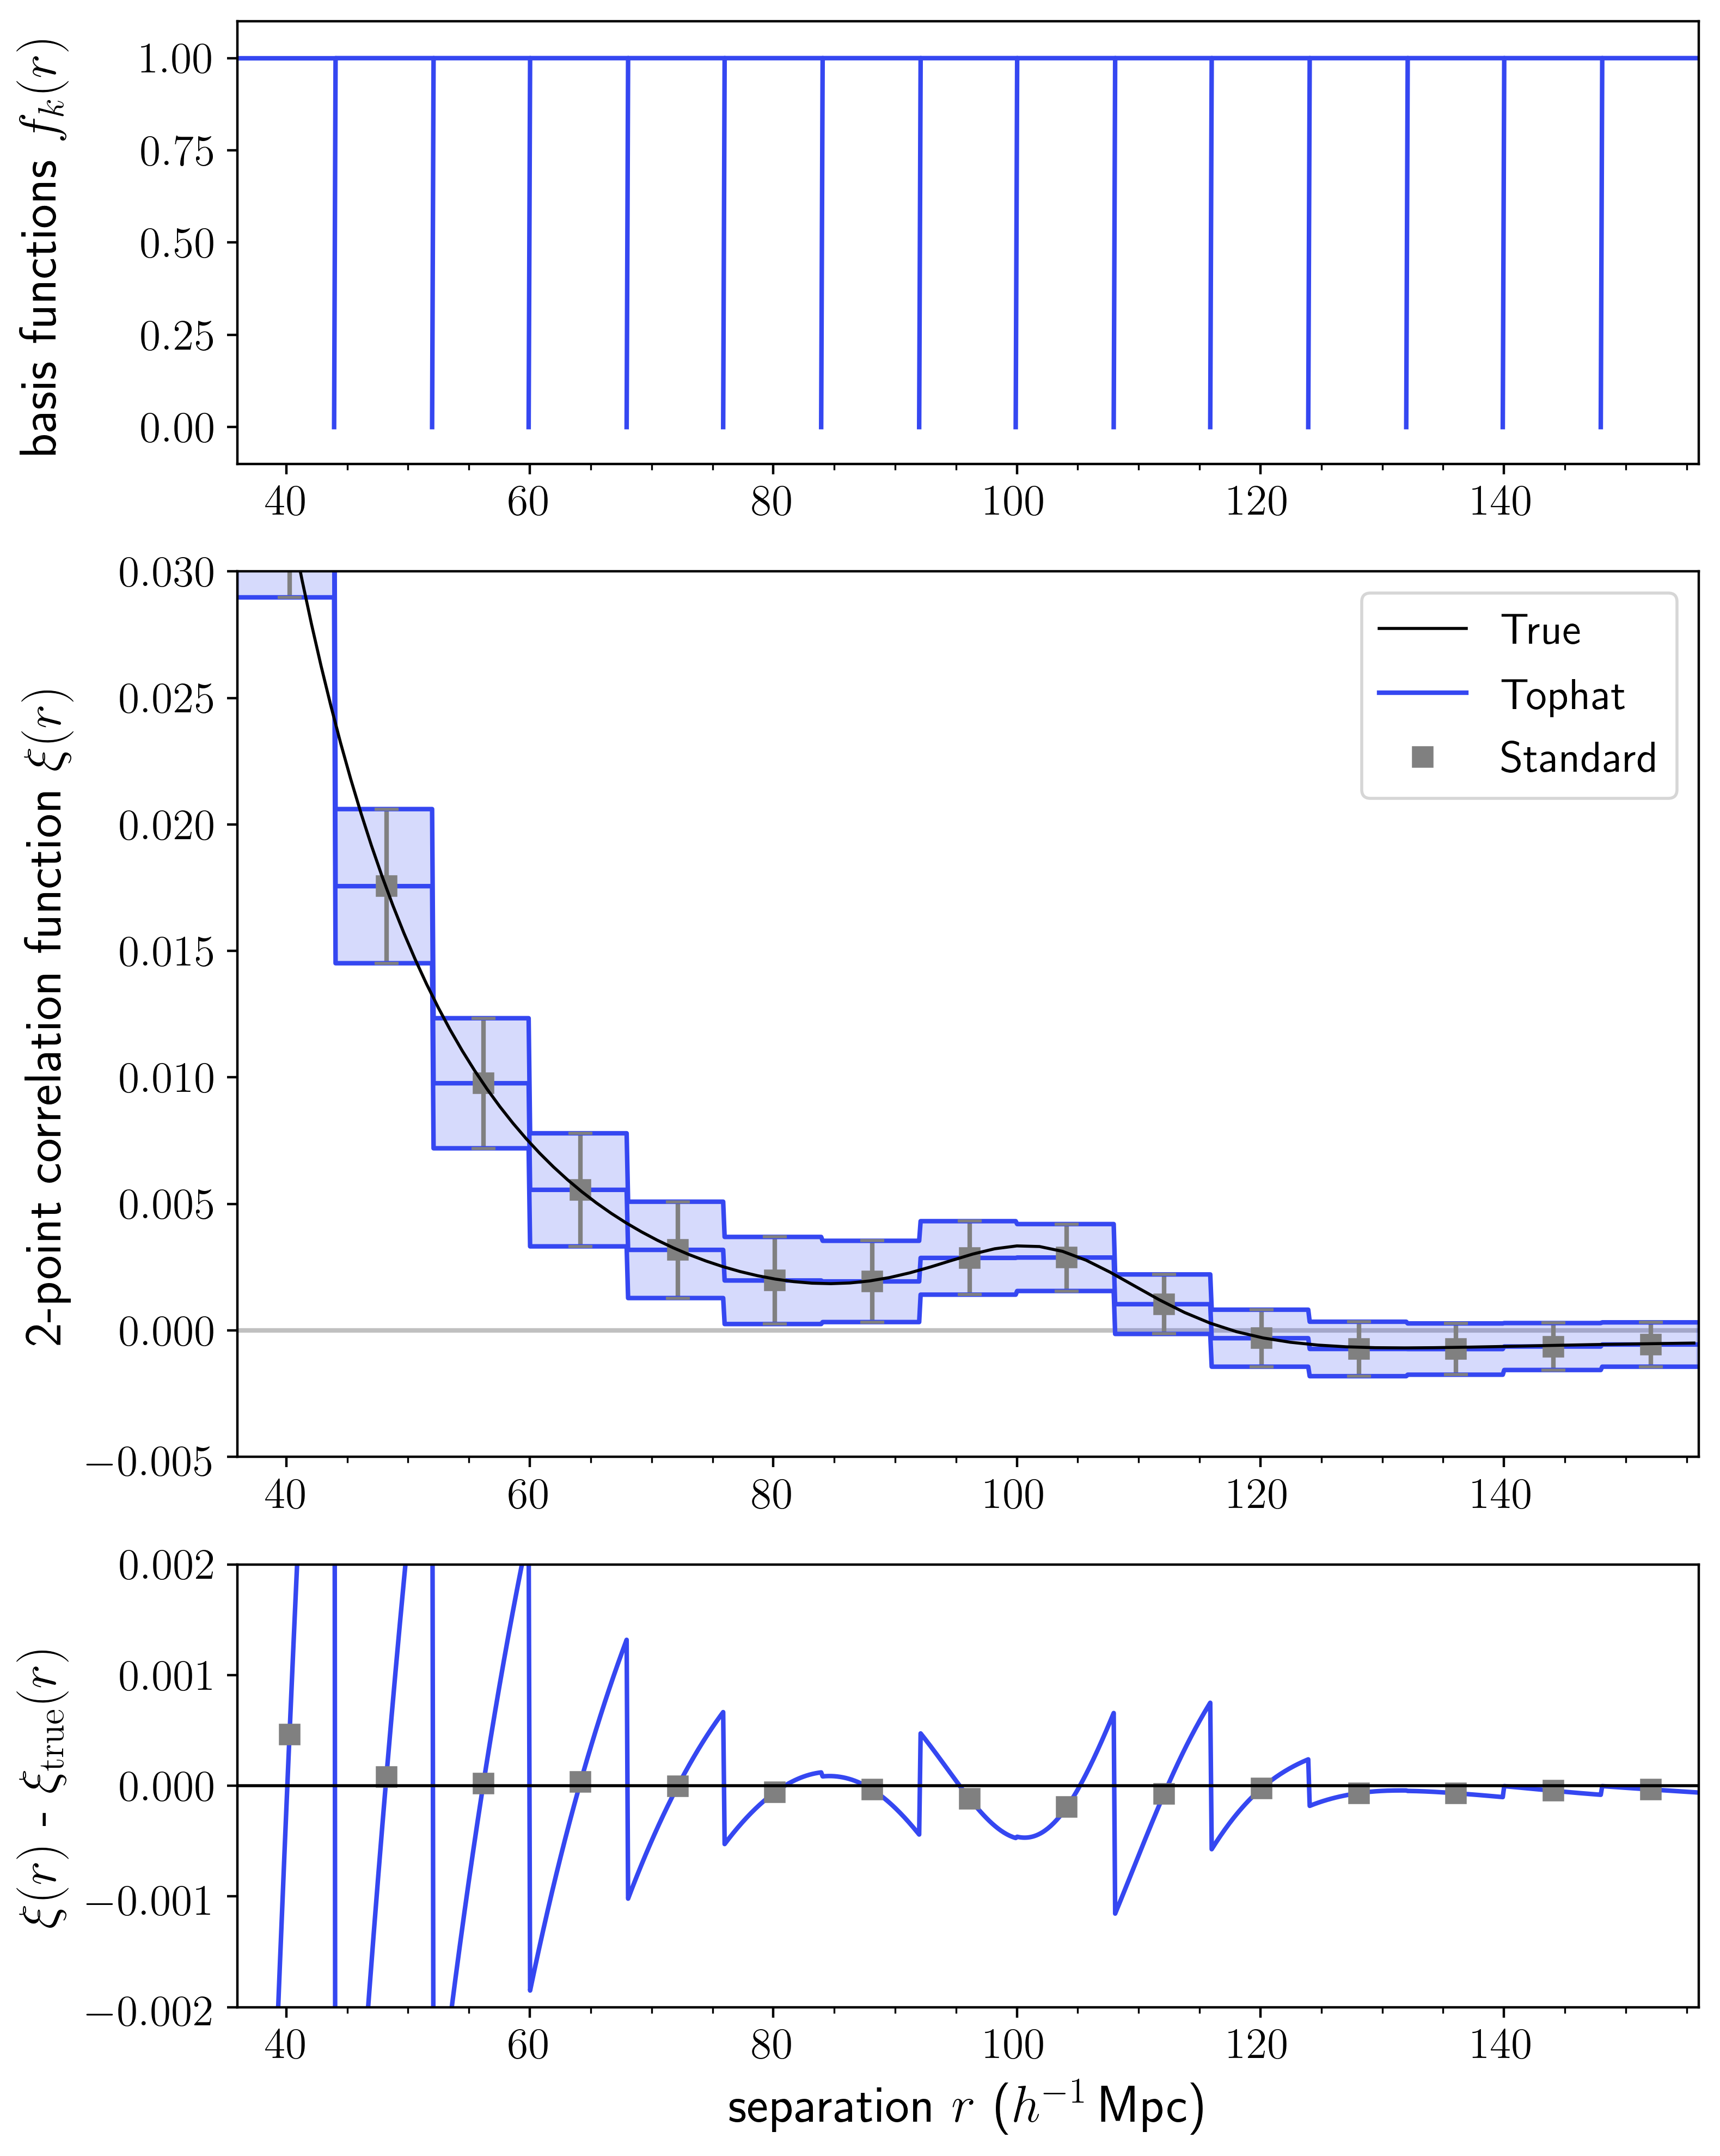

In [33]:
nbar = '2e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_theory_bw8']
colors = [ctopmid, ctheory]
labels = ['Tophat', 'Standard']
lws = [1.5, 0]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws,
                             Nrealizations=1000, show_bases=True, errlim=[-0.002, 0.002], ylim=[-0.005, 0.03],
                             conts=[True,False],
                             peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)

save_fn = f'xicomparison_{nbar}_tophat8_theory8.png'
plt.savefig(f'{plot_dir}/{save_fn}')

# bao plot

Number converged: 1000/1000


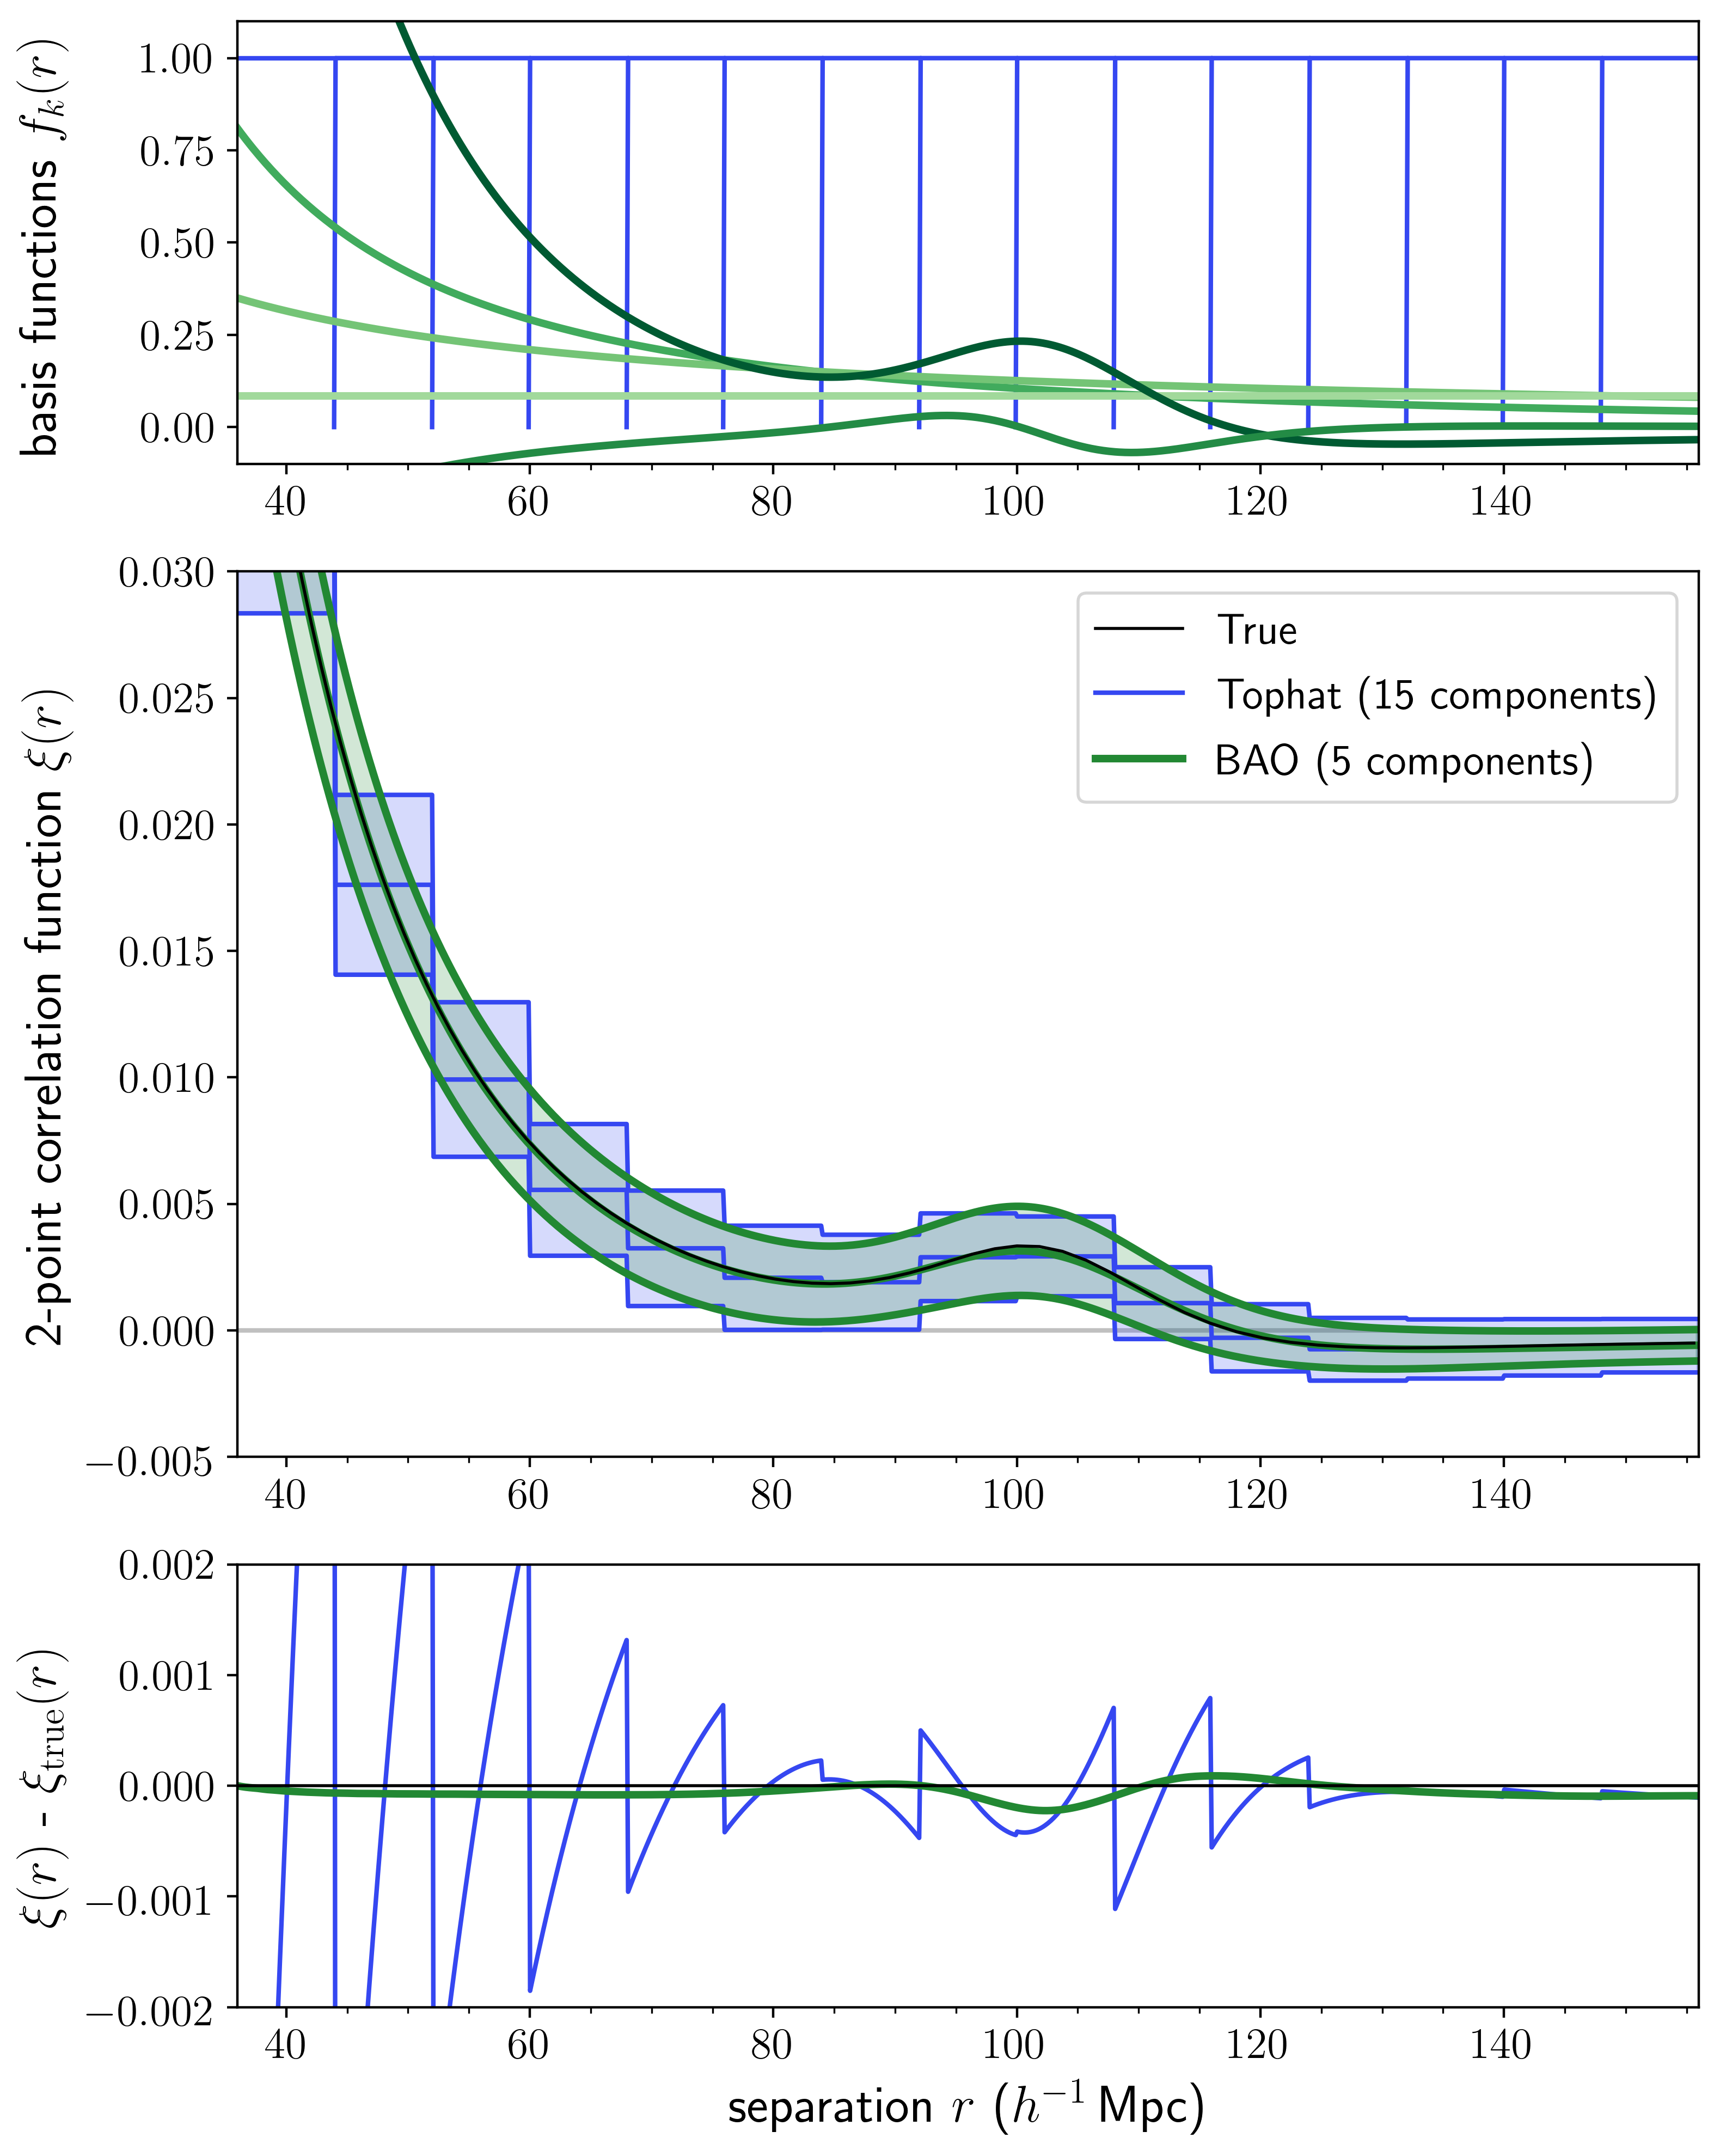

In [13]:
nbar = '1e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_baoiter_cosmob17_adaptive2']#, '_theory_bw8']
colors = [ctopmid, cbao]#, ctheory]
labels = ['Tophat (15 components)', 'BAO (5 components)']#, 'Standard']
lws = [1.5, 2.5]#, 0]
conts = [True,True]#,False]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws,
                             Nrealizations=1000, show_bases=True, errlim=[-0.002, 0.002], ylim=[-0.005, 0.03],
                             conts=conts,
                             peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)

save_fn = f'xicomparison_{nbar}_tophat8_baoiter.png'
plt.savefig(f'{plot_dir}/{save_fn}')

Number converged: 1000/1000


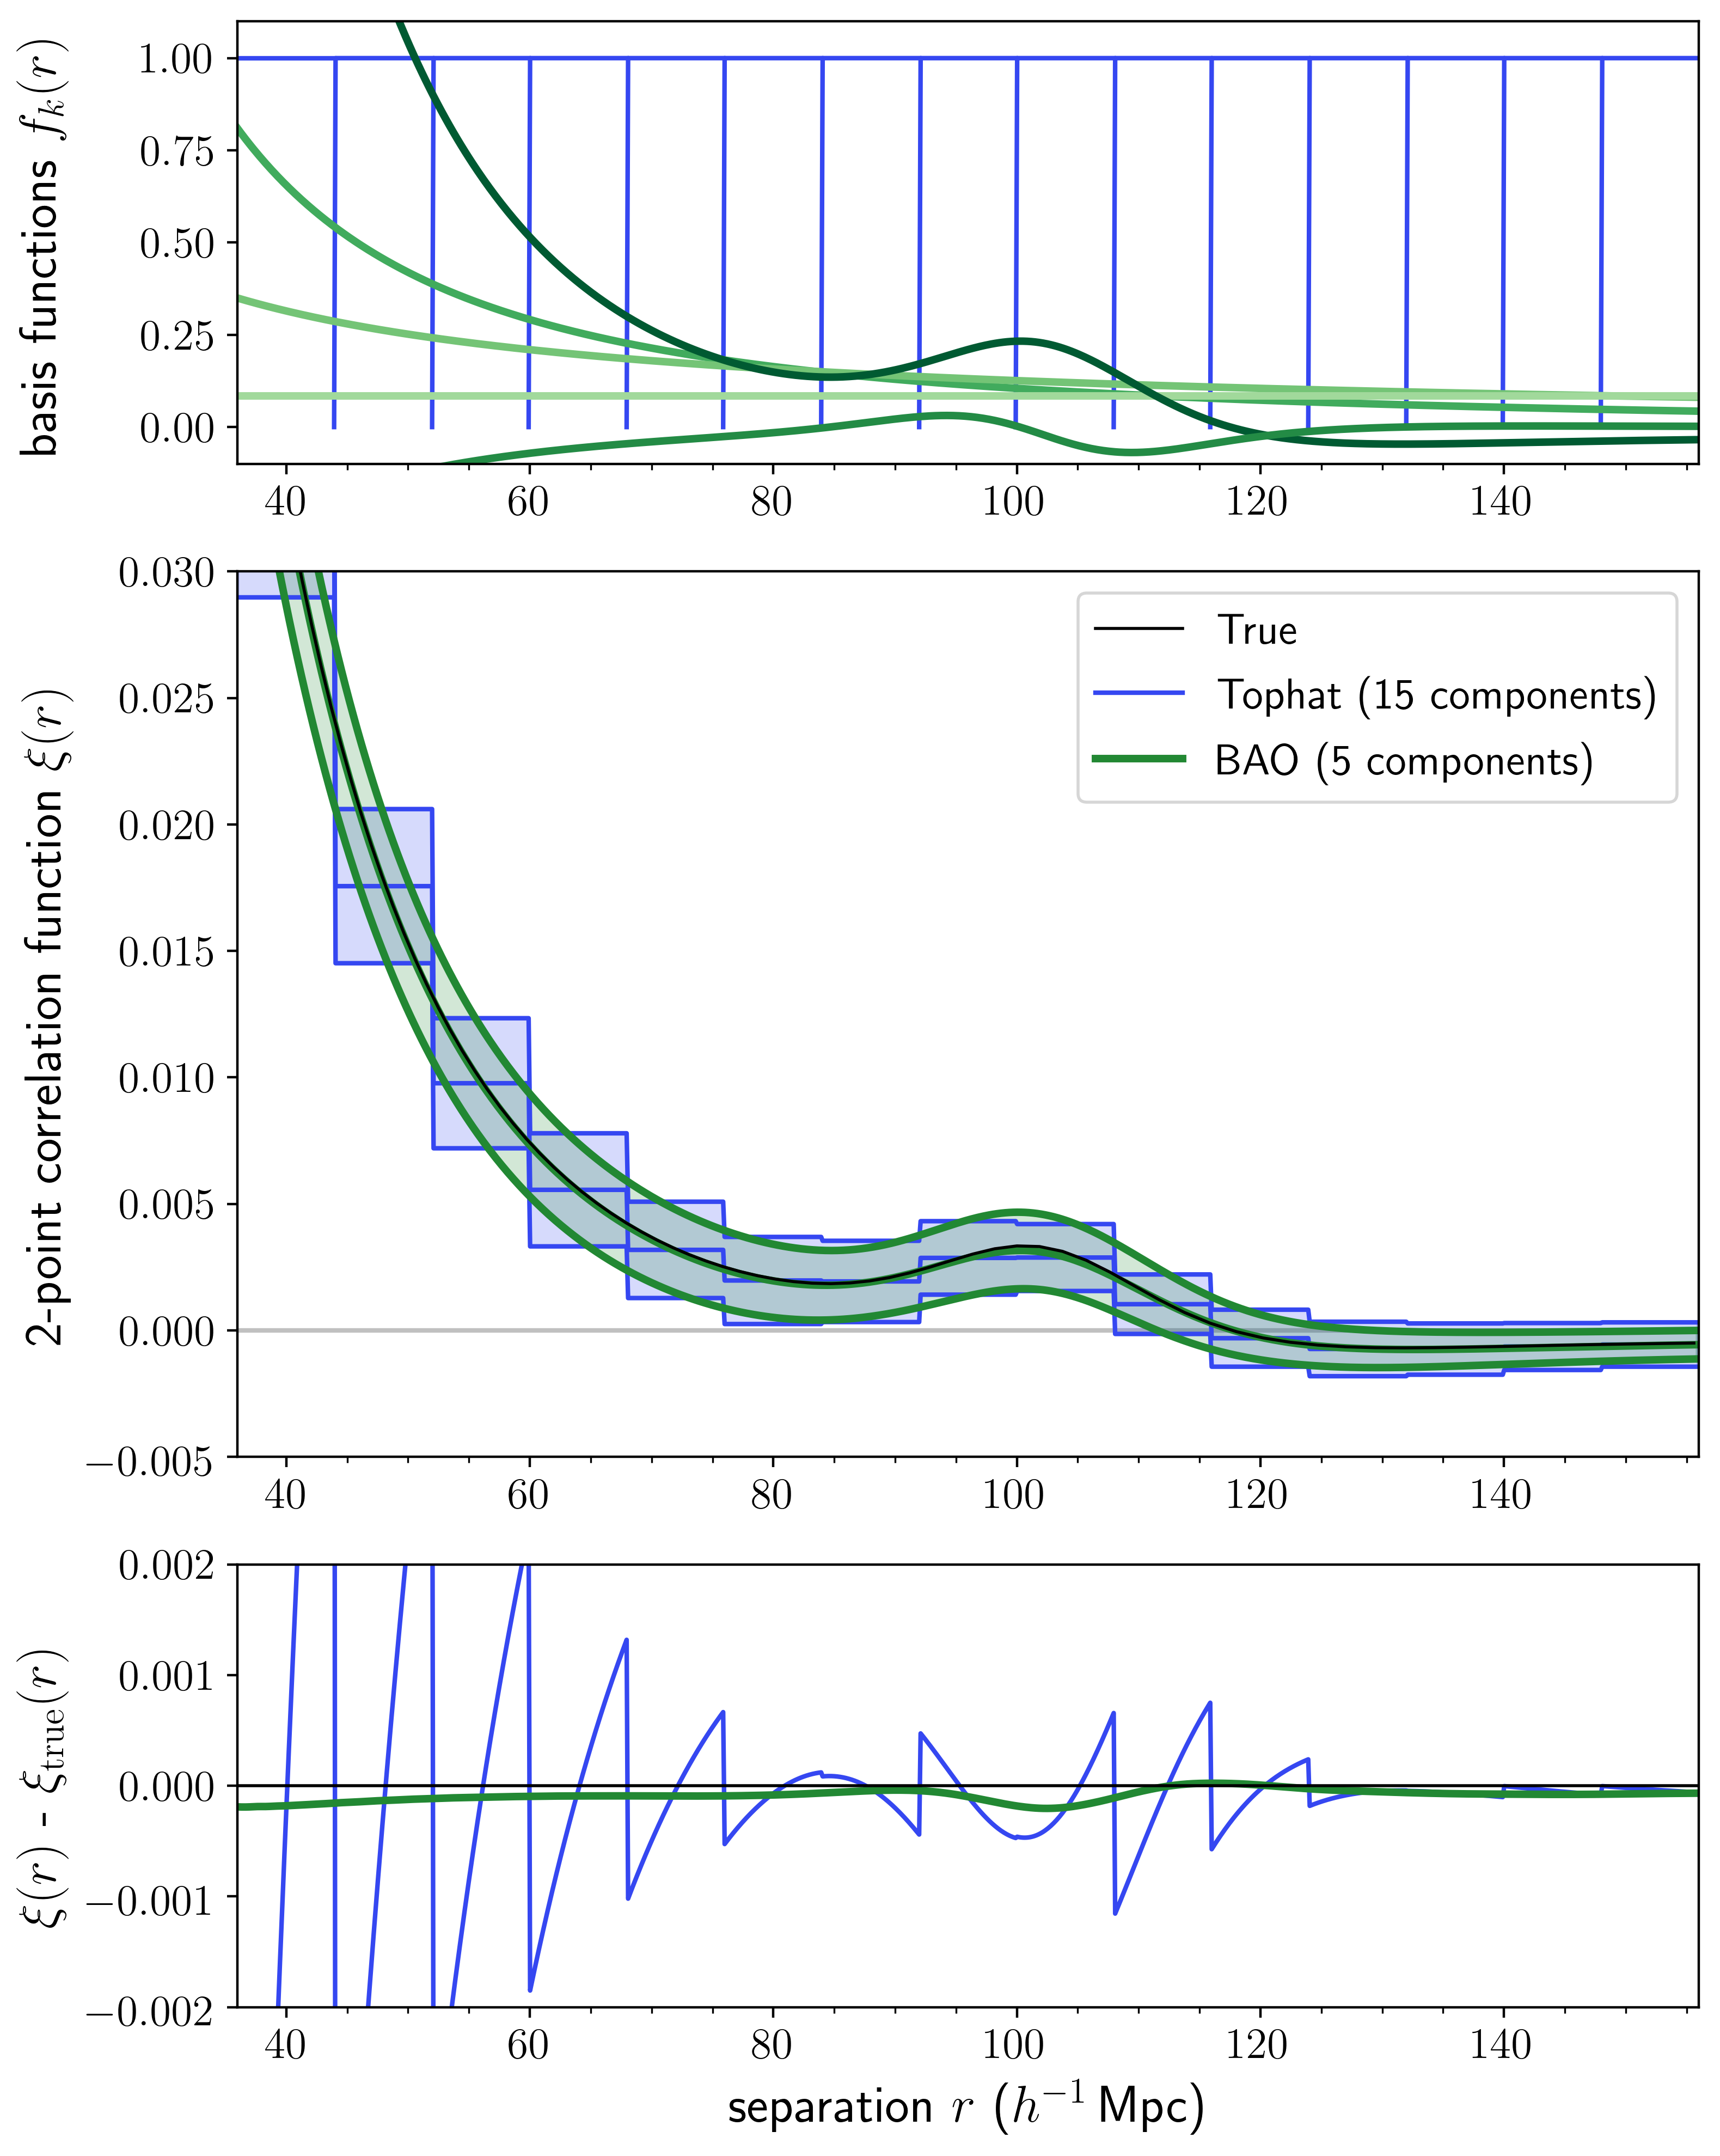

In [14]:
nbar = '2e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_baoiter_cosmob17_adaptive2']#, '_theory_bw8']
colors = [ctopmid, cbao]#, ctheory]
labels = ['Tophat (15 components)', 'BAO (5 components)']#, 'Standard']
lws = [1.5, 2.5]#, 0]
conts = [True,True]#,False]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws,
                             Nrealizations=1000, show_bases=True, errlim=[-0.002, 0.002], ylim=[-0.005, 0.03],
                             conts=conts,
                             peak_fit=False) #True, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true)

save_fn = f'xicomparison_{nbar}_tophat8_baoiter.png'
plt.savefig(f'{plot_dir}/{save_fn}')

## spline

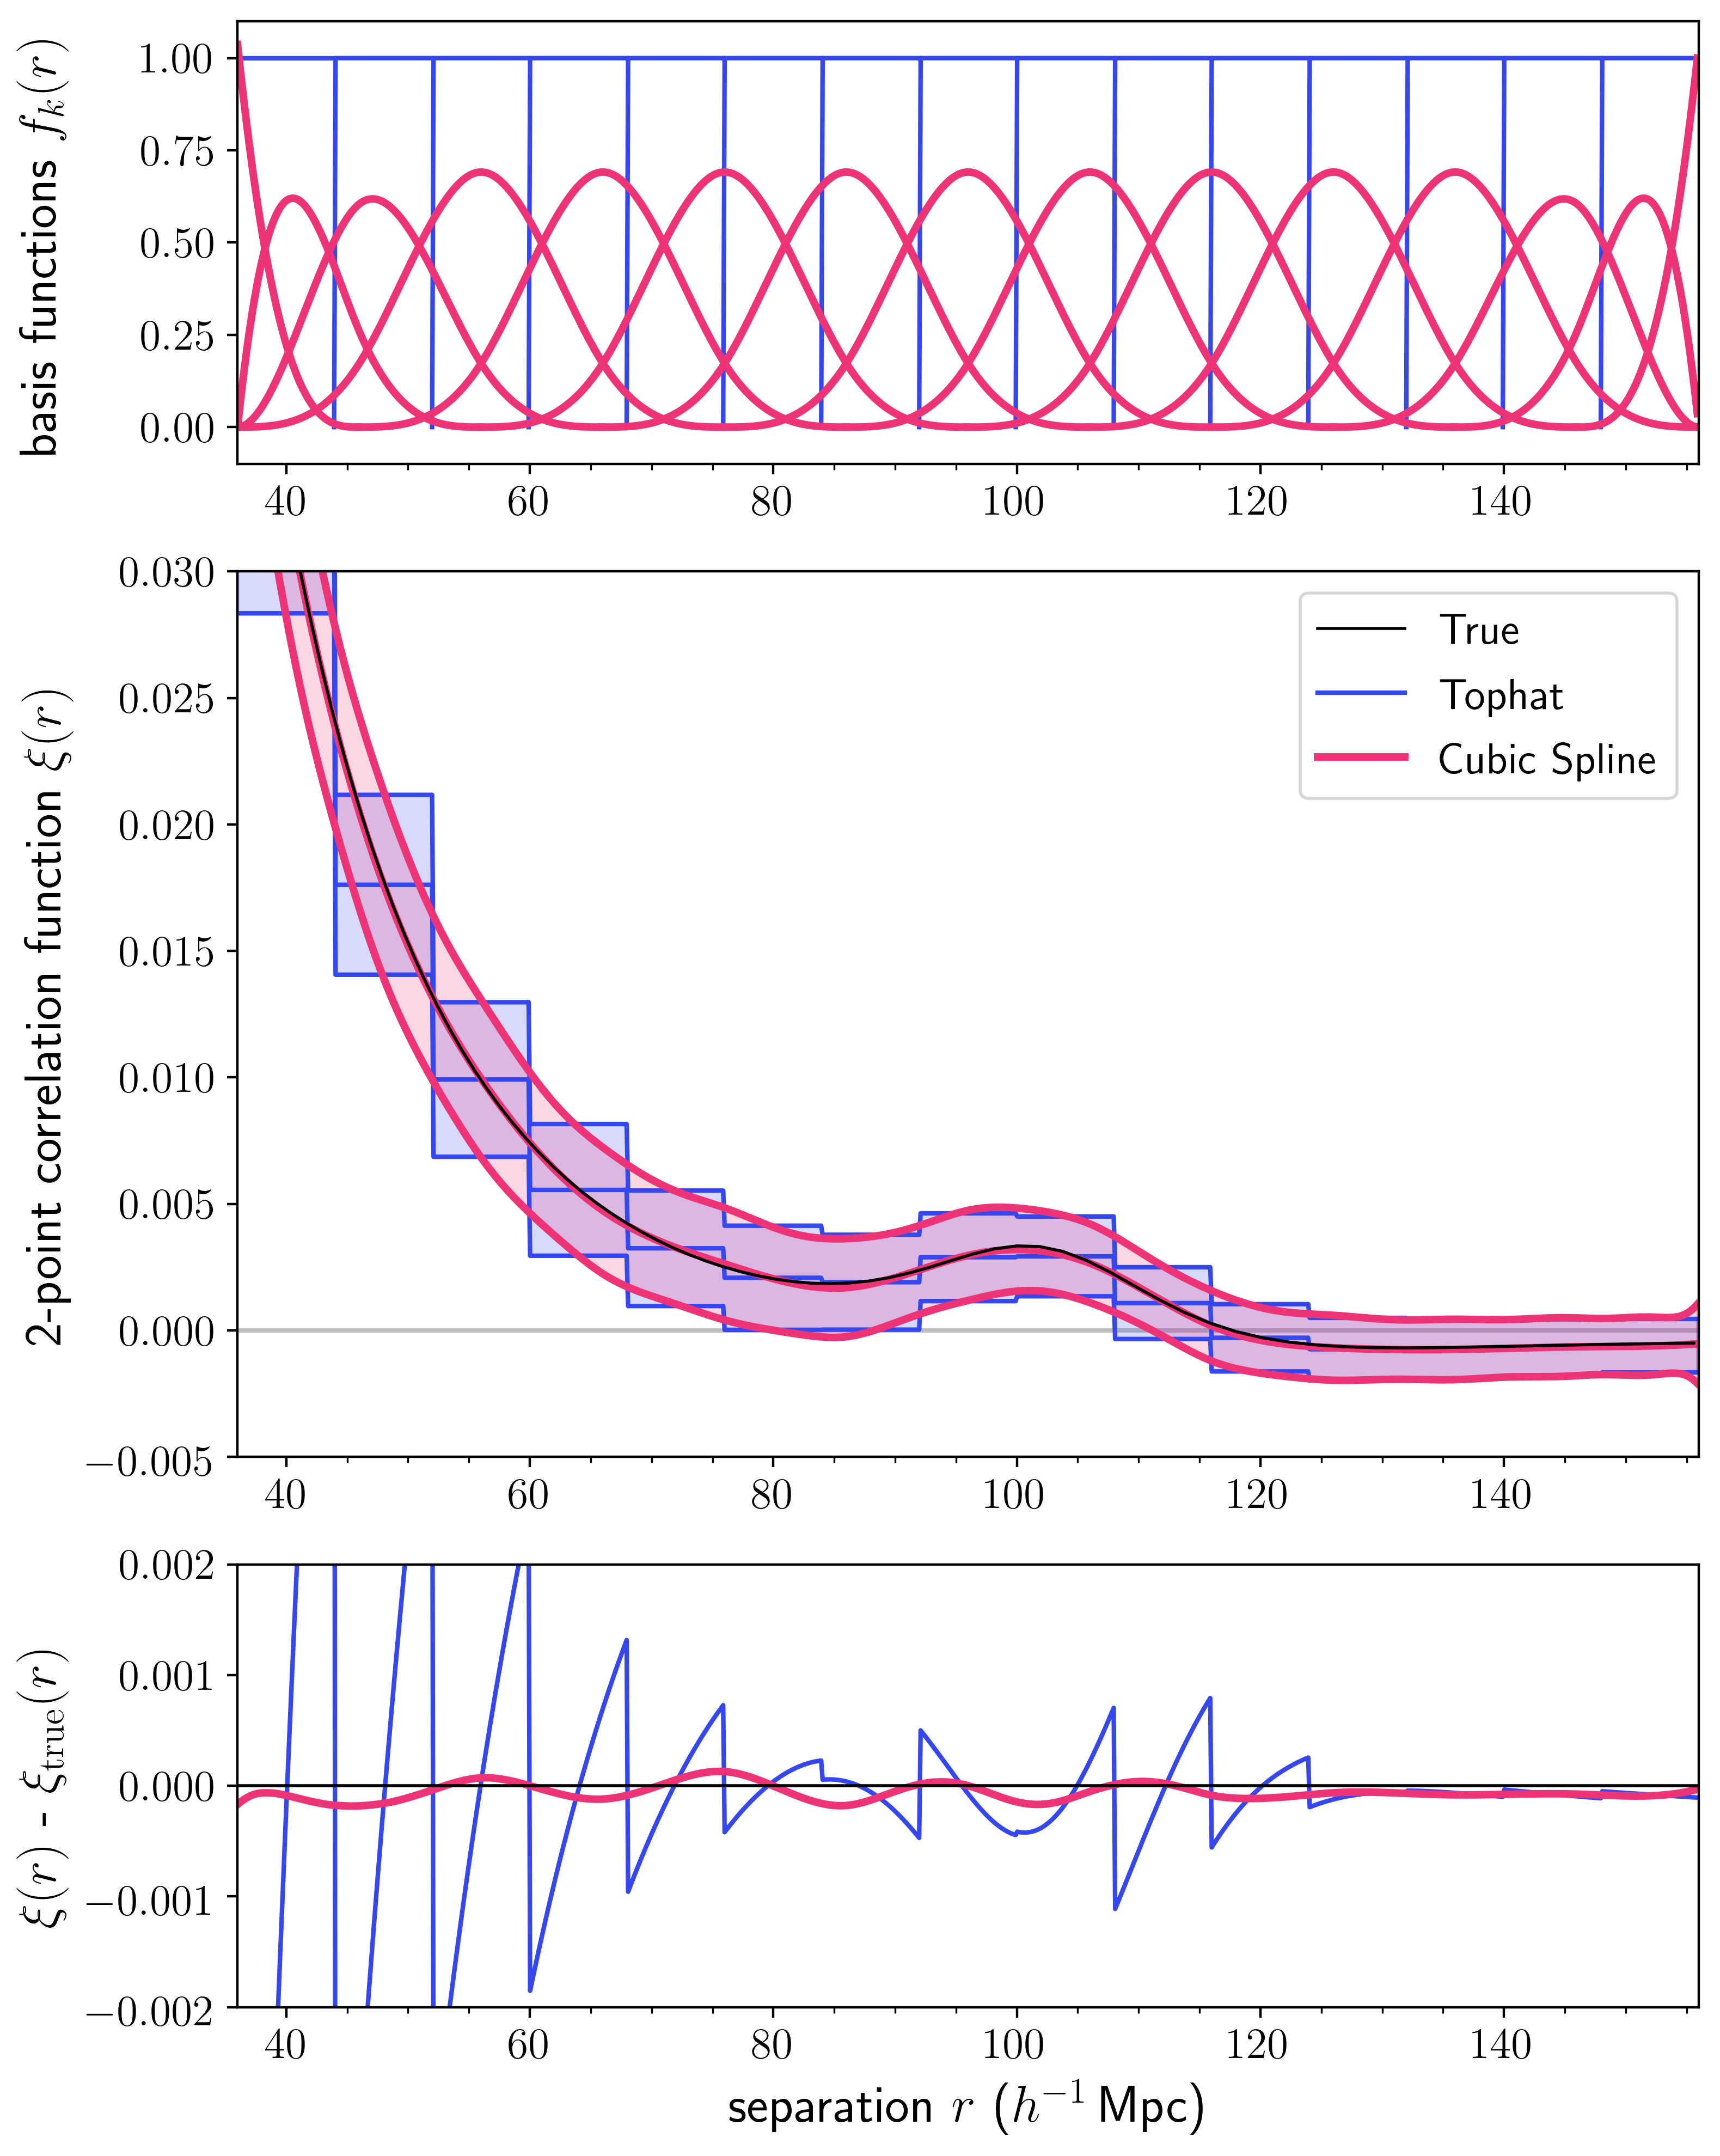

In [11]:
nbar = '1e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8']#, '_theory_bw8']
colors = [ctopmid, cspline]#, ctheory]
lws = [1.5, 2.5]#, 0]
labels = ['Tophat', 'Cubic Spline']#, 'Standard']
conts = [True, True]#, False]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws, 
                    Nrealizations=1000, show_bases=True, conts=conts,
                    #peak_fit=False, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true, 
                    errlim=[-0.002, 0.002], ylim=[-0.005, 0.03])

save_fn = f'xicomparison_{nbar}_tophat8_spline.png'
plt.savefig(f'{plot_dir}/{save_fn}')

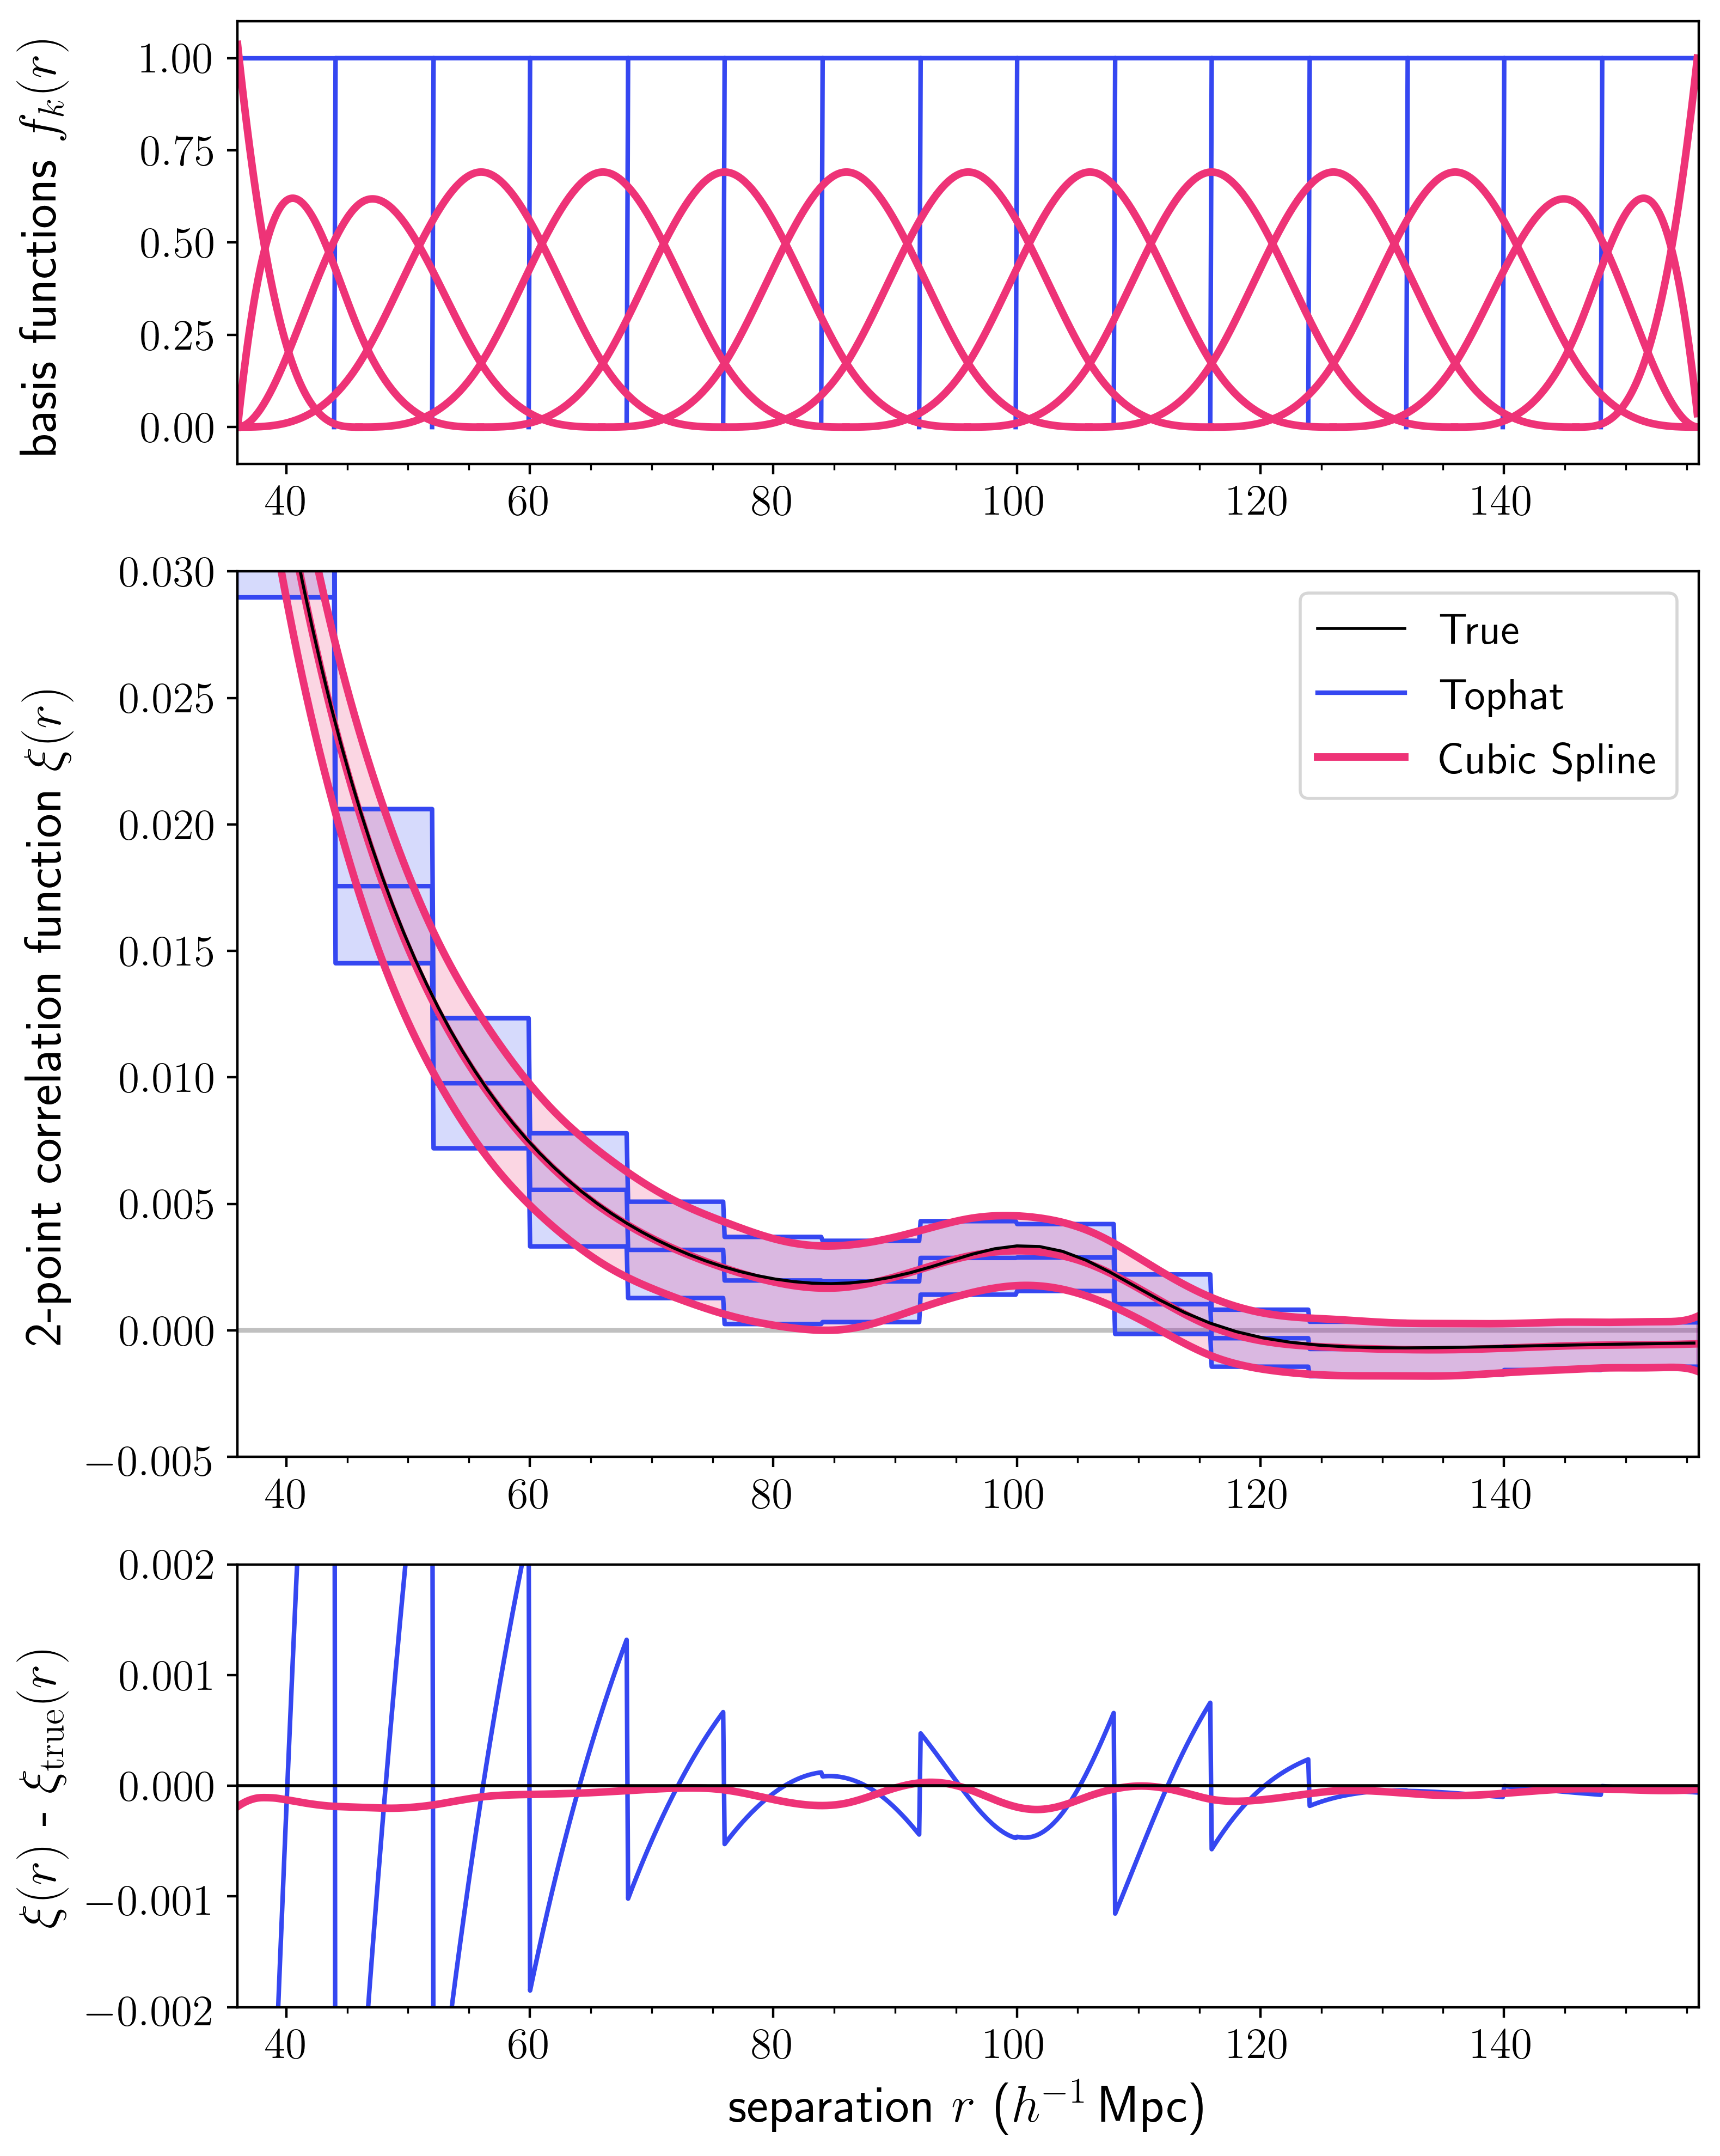

In [12]:
nbar = '2e-4'
cat_tag = f'_L750_n{nbar}_z057_patchy'
cf_tags = ['_tophat_bw8', '_spline3_bw8']#, '_theory_bw8']
colors = [ctopmid, cspline]#, ctheory]
lws = [1.5, 2.5]#, 0]
labels = ['Tophat', 'Cubic Spline']#, 'Standard']
conts = [True, True]#, False]
ax = plotter.plot_continuous(cat_tag, cf_tags, colors=colors, labels=labels, lws=lws, 
                    Nrealizations=1000, show_bases=True, conts=conts,
                    #peak_fit=False, bws=[6,2], r_widths=[15.,8.], r_max_true=r_max_true, 
                    errlim=[-0.002, 0.002], ylim=[-0.005, 0.03])

save_fn = f'xicomparison_{nbar}_tophat8_spline.png'
plt.savefig(f'{plot_dir}/{save_fn}')